In [1]:
# Necessary imports
import cv2
import numpy as np
#  Importing function cv2_imshow necessary for programming in Google Colab
from google.colab.patches import cv2_imshow

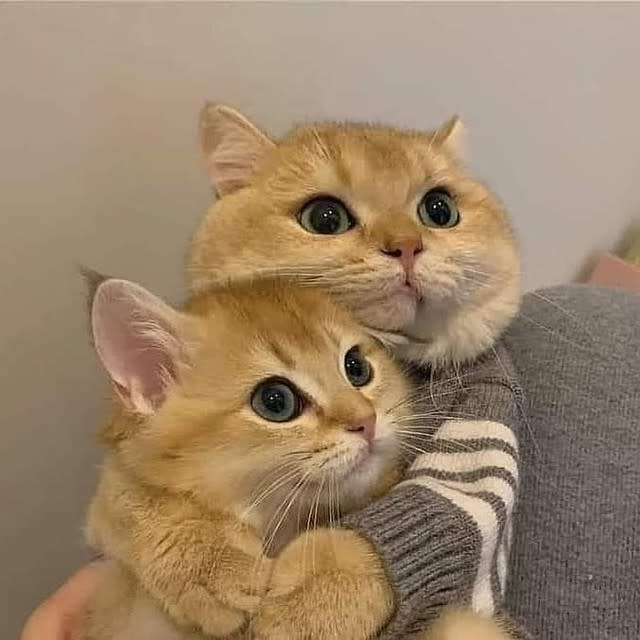

In [2]:
img = cv2.imread("cat.jpg")
cv2_imshow(img)

# detect the edges using Canny edge detector

https://datahacker.rs/opencv-canny-edge-detector/

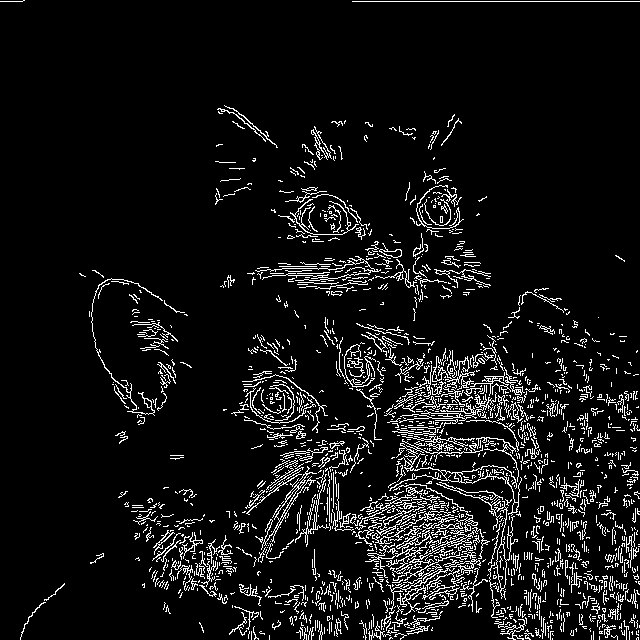

In [3]:
edges = cv2.Canny(img,100,150)
cv2_imshow(edges)

# using threshold method

https://datahacker.rs/opencv-thresholding/

__First step:__  Convert the original color image into a grayscale image. Also, before the threshold, we want to suppress the noise from the image to reduce the number of detected edges that are undesired. To accomplish this, we will apply the median filter which replaces each pixel value with the median value of all the pixels in a small pixel neighborhood. The function cv2.medianBlur()

The next step is to apply cv2.adaptiveThreshold()function. As the parameters for this function we need to define:

  max value which will be set to 255

  cv2.ADAPTIVE_THRESH_MEAN_C : a threshold value is the mean of 
  the neighbourhood area.

  cv2.ADAPTIVE_THRESH_GAUSSIAN_C : a threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
  
  Block Size – It determents the size of the neighbourhood area.
  C – It is just a constant which is subtracted from the calculated mean (or the weighted mean).

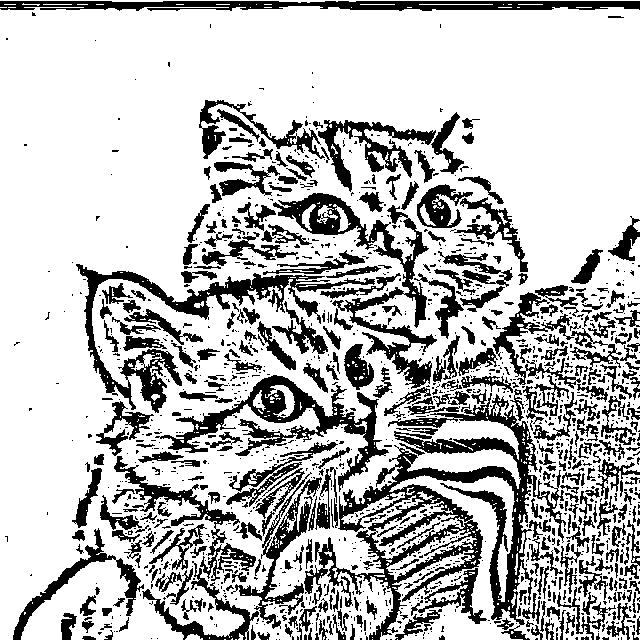

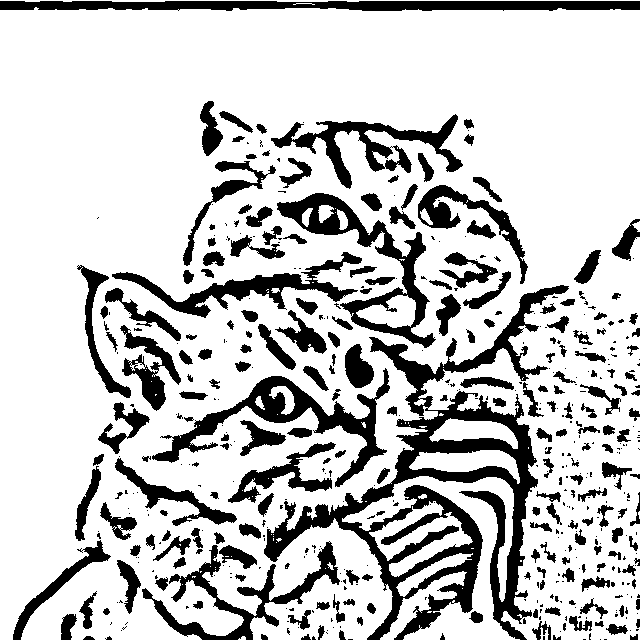

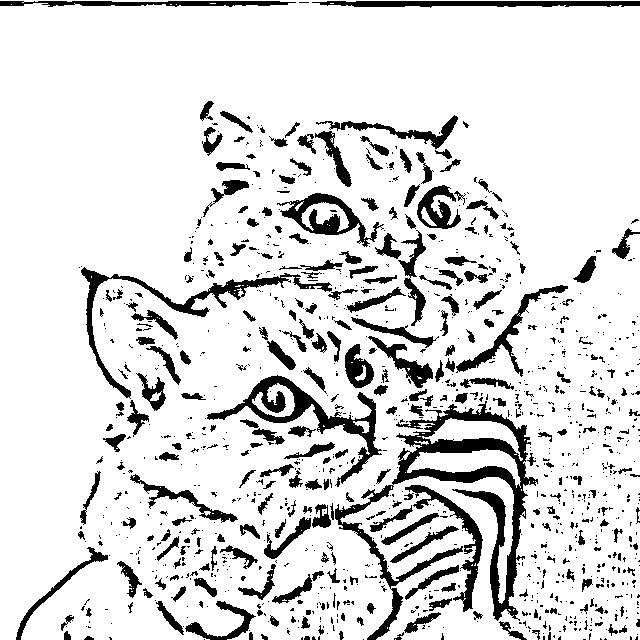

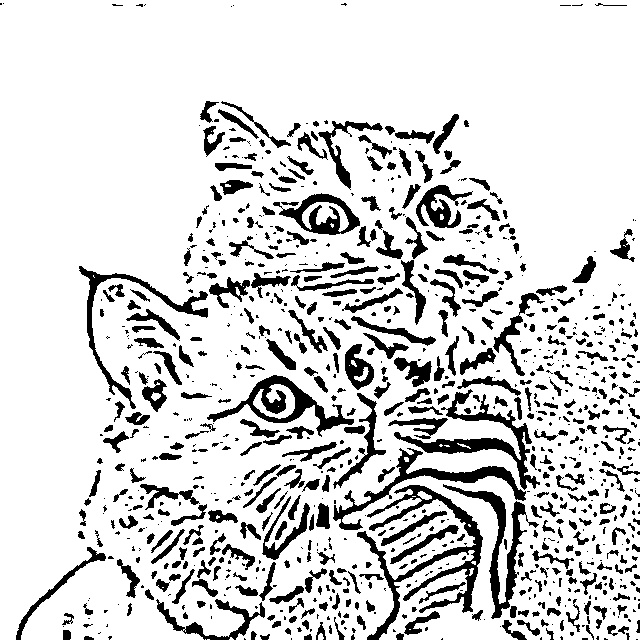

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_1 = cv2.medianBlur(gray, 5)
edges1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
cv2_imshow(edges1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_Blured = cv2.medianBlur(gray, 9)
edges_blured = cv2.adaptiveThreshold(gray_Blured, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
cv2_imshow(edges_blured)

edges_blured_Gaussian = cv2.adaptiveThreshold(gray_Blured,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,21,3)
cv2_imshow(edges_blured_Gaussian)

blur = cv2.GaussianBlur(gray,(9,9),0)
edges_blured_Gaussian1 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,21,3)
cv2_imshow(edges_blured_Gaussian1)


#  Image filtering:

a filter that is suitable for converting an RGB image into a color painting or a cartoon. There are several filters that we can use. For example, if we choose to use cv2.medianBlur() filter we will obtain a solid result. We will manage to blur the colors of the image so that they appear more homogeneous. On the other hand, this filter will also blur the edges and this is something that we want to avoid.


The most suitable filter for our goal is a bilateral filter because it smooths flat regions of the image while keeping the edges sharp.


__Bilateral filter__
Bilateral filter is one of the most commonly used edge-preserving and noise-reducing filters. In the following image you can see an example of a bilateral filter in 3D when it is processing an edge area in the image.

__cv2.bilateralFilter() function:__

d – Diameter of each pixel neighborhood that is used during filtering.

sigmaColor – the standard deviation of the filter in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color.


sigmaSpace –the standard deviation of the filter in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough.

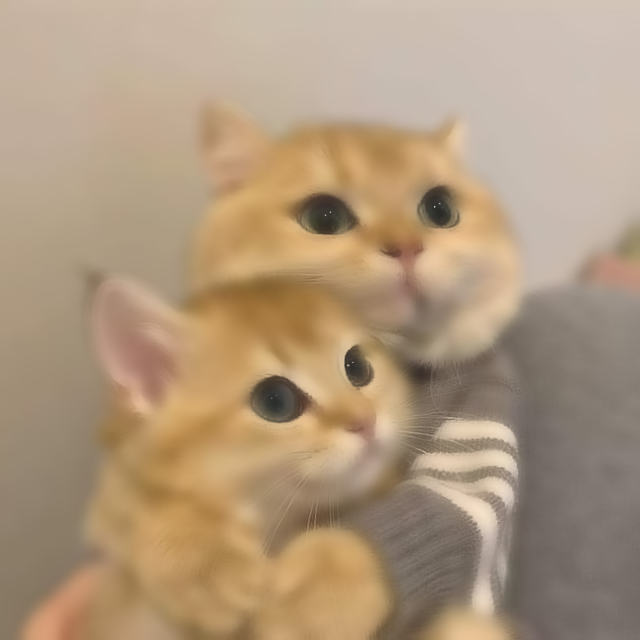

In [19]:
color = cv2.bilateralFilter(img, d=20, sigmaColor=200,sigmaSpace=100)
cv2_imshow(color+20)

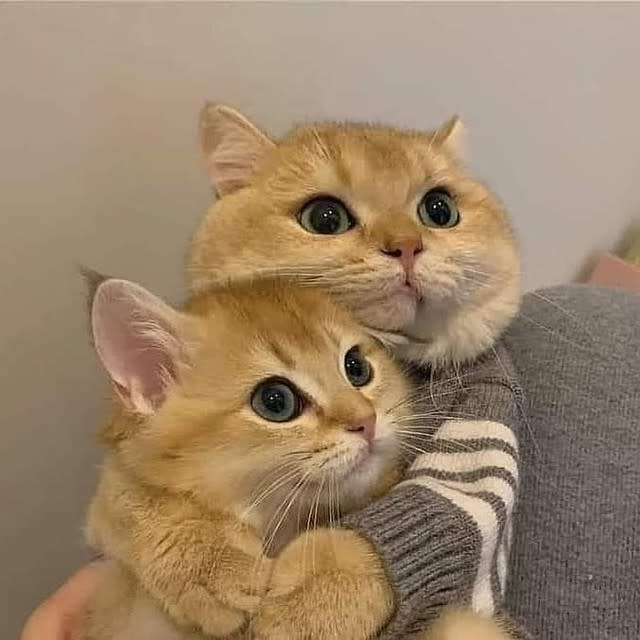

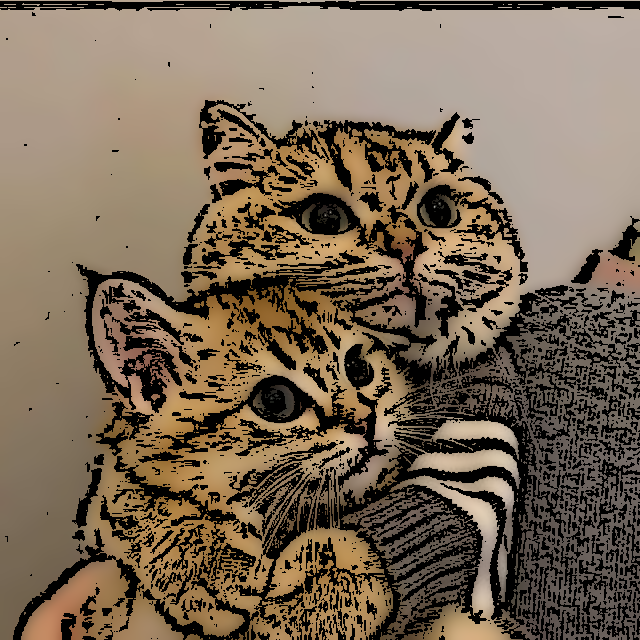

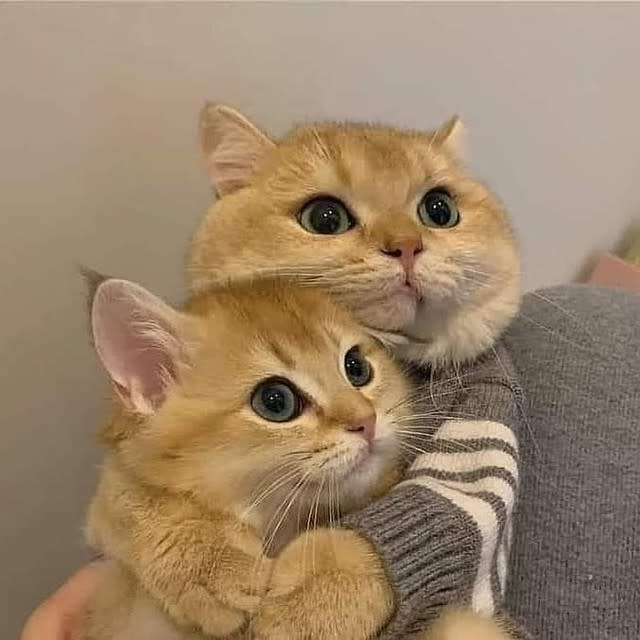

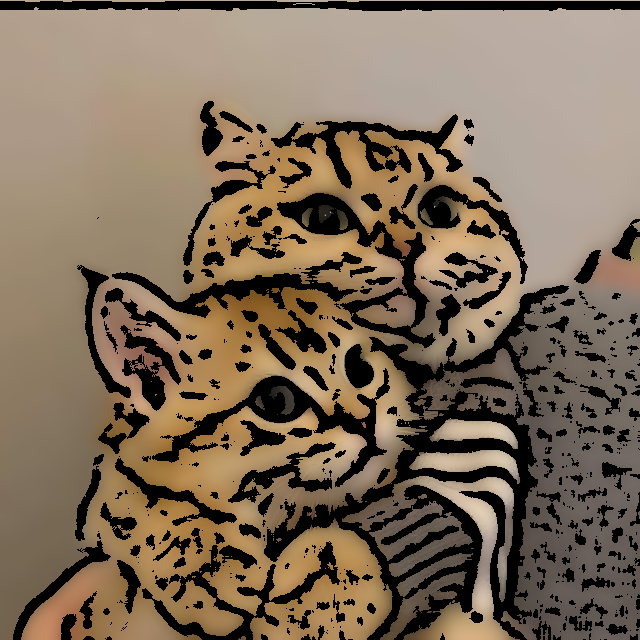

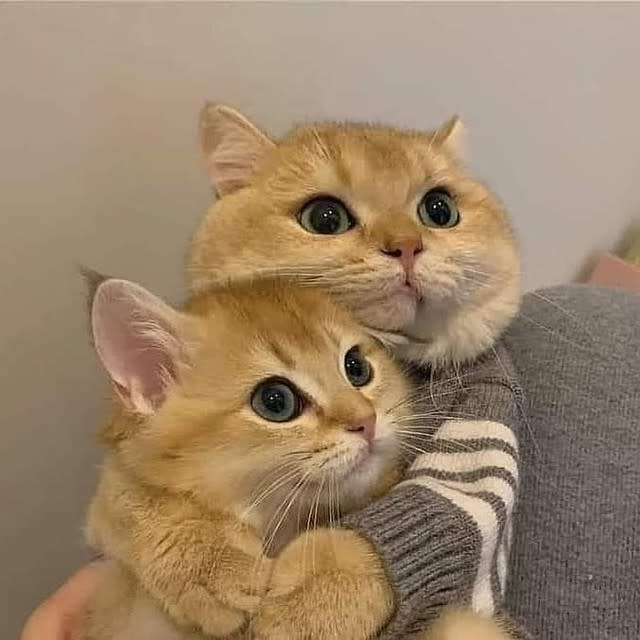

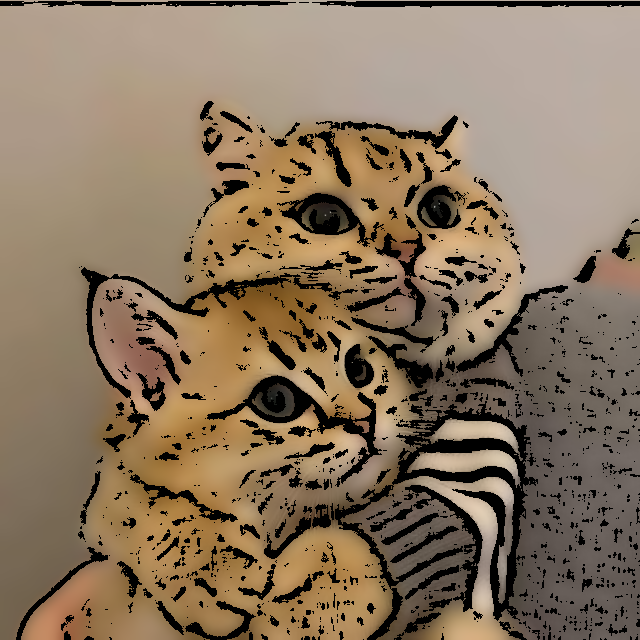

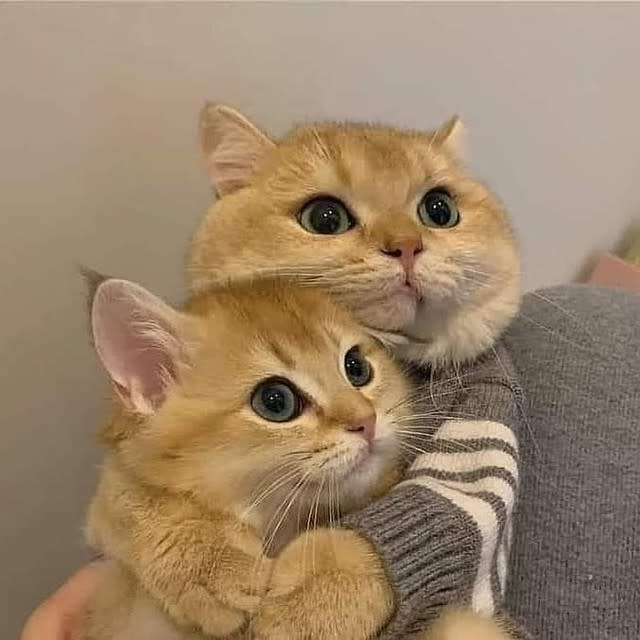

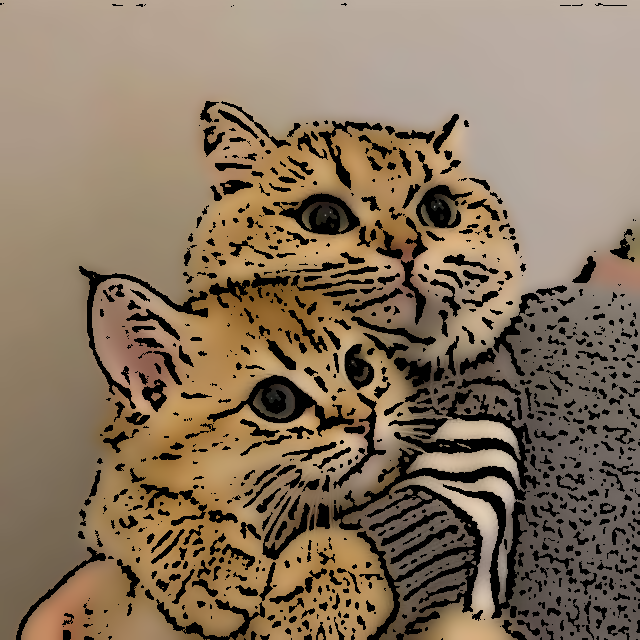

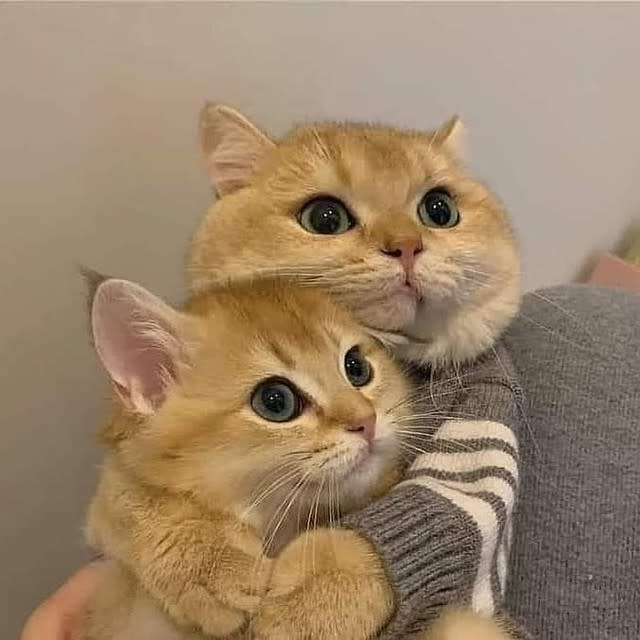

In [20]:
masks=[edges1,edges_blured,edges_blured_Gaussian,edges_blured_Gaussian1]
cv2_imshow(img)
for mask in masks :
  cartoon = cv2.bitwise_and(color, color, mask=mask)
  cv2_imshow(cartoon)